In [5]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib_venn import venn2
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.compose import ColumnTransformer
import numpy as np
from catboost import CatBoostClassifier, Pool
import ast

In [50]:
#загружаем трэйн
train_df = pd.read_parquet('data\\train_df.parquet')

In [51]:

#дропаем лишние столбцы (если они есть)
#columns_to_drop = ['median_length',  'average_common_categories', 'average_categories']
#df_orders_flat = df_orders_flat.drop(columns=columns_to_drop)

In [52]:
#загружаем валидацию
val_df = pd.read_parquet('data\\val_df.parquet')

In [53]:
def preprocess_dataframe(df):    
    df = df.drop(columns=['user_id'])
    df['target'] = df['target'].map({'male': 0, 'female': 1})
    return df

In [54]:
train_df_proc = preprocess_dataframe(train_df)
train_df_proc

,target,length_mean,order_site-id_count,order_site-id_unique,id_count,id_count_unique,count_sum,session-duration_mean,pages-count_mean,visit_site-id_count,visit_site-id_unique
0,1,3.0,3.0,2.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,1,11.0,0.0,0.0,0.0,0.0,0.0,56.000000,1.500000,2.0,1.0
2,0,16.0,2.0,2.0,1.0,1.0,1.0,195.928571,4.571429,14.0,3.0
3,0,27.0,9.0,4.0,4.0,4.0,4.0,267.764706,3.176471,17.0,6.0
4,1,35.0,6.0,3.0,5.0,5.0,5.0,279.391304,5.391304,23.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
119546,0,11.0,5.0,2.0,3.0,3.0,3.0,2.500000,1.500000,2.0,2.0
119547,0,13.0,3.0,2.0,1.0,1.0,1.0,0.000000,1.000000,1.0,1.0
119548,1,24.0,17.0,1.0,17.0,12.0,20.0,106.600000,2.428571,35.0,8.0
119549,1,8.0,1.0,1.0,1.0,1.0,0.0,101.000000,2.250000,4.0,2.0


In [55]:
val_df_proc = preprocess_dataframe(val_df)
val_df_proc

,target,length_mean,order_site-id_count,order_site-id_unique,id_count,id_count_unique,count_sum,session-duration_mean,pages-count_mean,visit_site-id_count,visit_site-id_unique
0,1,8.0,1.0,1.0,1.0,1.0,0.0,95.833333,1.583333,12.0,2.0
1,0,16.0,16.0,4.0,14.0,14.0,16.0,621.000000,4.000000,3.0,3.0
2,1,50.0,38.0,5.0,38.0,35.0,67.0,179.884615,4.365385,52.0,15.0
3,1,34.0,52.0,3.0,52.0,46.0,52.0,105.314286,2.657143,35.0,9.0
4,1,12.0,0.0,0.0,0.0,0.0,0.0,296.000000,18.333333,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
27442,1,22.0,9.0,6.0,7.0,6.0,9.0,0.000000,1.000000,2.0,1.0
27443,0,7.0,3.0,1.0,0.0,0.0,0.0,15.333333,1.333333,3.0,2.0
27444,1,23.0,2.0,1.0,2.0,2.0,2.0,89.307692,1.846154,13.0,5.0
27445,0,27.0,3.0,2.0,0.0,0.0,0.0,99.818182,2.272727,22.0,11.0


In [56]:
# Разделение данных на train и test

X_train = train_df_proc.drop(columns=['target'])
y_train = train_df_proc['target']

X_test = val_df_proc.drop(columns=['target'])
y_test = val_df_proc['target']

[0]	test-error:0.40442	train-error:0.40287
[1]	test-error:0.39385	train-error:0.39415
[2]	test-error:0.39429	train-error:0.39446
[3]	test-error:0.39392	train-error:0.39169
[4]	test-error:0.39104	train-error:0.38915
[5]	test-error:0.39057	train-error:0.38855
[6]	test-error:0.38718	train-error:0.38621
[7]	test-error:0.38671	train-error:0.38569
[8]	test-error:0.38766	train-error:0.38614
[9]	test-error:0.38281	train-error:0.38038


C:\Users\Yury\anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[10]	test-error:0.38146	train-error:0.37920
[11]	test-error:0.37964	train-error:0.37576
[12]	test-error:0.37596	train-error:0.37239
[13]	test-error:0.37698	train-error:0.37214
[14]	test-error:0.37687	train-error:0.37159
[15]	test-error:0.37596	train-error:0.36942
[16]	test-error:0.37265	train-error:0.36641
[17]	test-error:0.37112	train-error:0.36498
[18]	test-error:0.36980	train-error:0.36180
[19]	test-error:0.36988	train-error:0.36074
[20]	test-error:0.36922	train-error:0.35985
[21]	test-error:0.36660	train-error:0.35785
[22]	test-error:0.36565	train-error:0.35742
[23]	test-error:0.36689	train-error:0.35778
[24]	test-error:0.36569	train-error:0.35658
[25]	test-error:0.36463	train-error:0.35578
[26]	test-error:0.36390	train-error:0.35508
[27]	test-error:0.36292	train-error:0.35464
[28]	test-error:0.36321	train-error:0.35451
[29]	test-error:0.36281	train-error:0.35420
[30]	test-error:0.36215	train-error:0.35374
[31]	test-error:0.36102	train-error:0.35296
[32]	test-error:0.36059	train-er

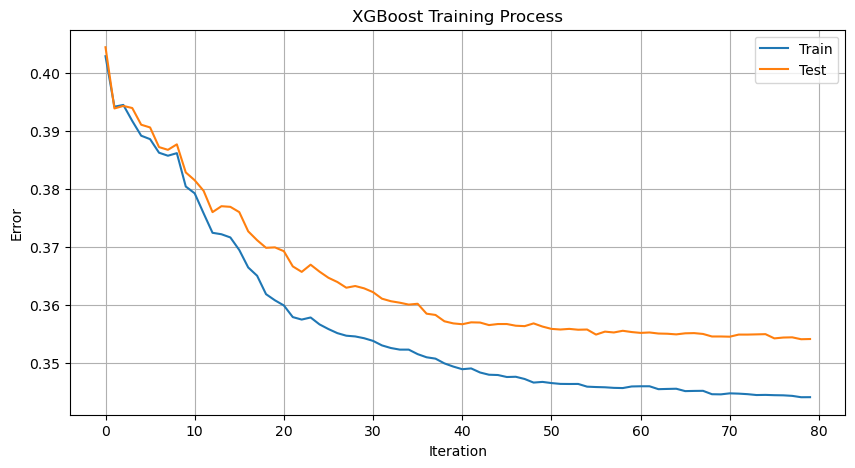

In [57]:
# Создание DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Определение параметров
param = {
    'max_depth': 3,  # глубина деревьев
    'eta': 0.3,  # шаг обучения
    'objective': 'binary:logistic',  # тип задачи
    'eval_metric': 'error'  # метрика оценки
}


# Обучение модели
num_round = 80 #эпохи
evals = [(dtest, 'test'), (dtrain, 'train')]
evals_result = {}
bst = xgb.train(param, dtrain, num_round, evals, early_stopping_rounds=10, evals_result=evals_result)

# Предсказание на тестовом наборе данных
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

# Вычисление точности
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

plt.figure(figsize=(10,5))
plt.plot(evals_result['train']['error'], label='Train')
plt.plot(evals_result['test']['error'], label='Test')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('XGBoost Training Process')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
# Создание пула данных для CatBoost
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# Определение параметров
params = {
    'iterations': 190,
    'depth': 3,
    'learning_rate':0.3,
    'l2_leaf_reg': 5,
    'loss_function': 'Logloss',
    'eval_metric': 'Accuracy',
    'verbose': 10
}

# Создание и обучение модели
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=test_pool, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5986148	test: 0.5931067	best: 0.5931067 (0)	total: 6ms	remaining: 1.13s
10:	learn: 0.6215088	test: 0.6211243	best: 0.6211243 (10)	total: 57.3ms	remaining: 933ms
20:	learn: 0.6348253	test: 0.6303785	best: 0.6303785 (20)	total: 109ms	remaining: 878ms
30:	learn: 0.6413246	test: 0.6332568	best: 0.6338398 (28)	total: 159ms	remaining: 817ms
40:	learn: 0.6440264	test: 0.6356615	best: 0.6358072 (39)	total: 211ms	remaining: 765ms
50:	learn: 0.6481920	test: 0.6394870	best: 0.6395599 (49)	total: 263ms	remaining: 717ms
60:	learn: 0.6497645	test: 0.6420374	best: 0.6420374 (56)	total: 314ms	remaining: 663ms
70:	learn: 0.6507097	test: 0.6438226	best: 0.6439684 (69)	total: 367ms	remaining: 615ms
80:	learn: 0.6527256	test: 0.6442598	best: 0.6447335 (71)	total: 419ms	remaining: 564ms
90:	learn: 0.6533362	test: 0.6450978	best: 0.6450978 (90)	total: 471ms	remaining: 512ms
100:	learn: 0.6535453	test: 0.6451343	best: 0.6453164 (96)	total: 523ms	remaining: 461ms
110:	learn: 0.6543400	test: 0.6460